In [590]:
import pandas as pd
import numpy as np

# 1. Data Preparation

In [591]:
# load dataset
data = pd.read_csv('data/Dataset_DeConinck_R.csv', encoding='latin-1')
# Add an ID column
data['ID'] = range(1, len(data) + 1)  # This will create IDs starting from 1

In [592]:
# check format
data.head(10)

,cntry,ans_id,V001,V002,V002bea,V002beb,V002at,V002de,V002es,V002it,...,V058_6,V058_7,V058_8,V058_9,V058_10,V059,Leeftijd3N,Diploma2,Weging,ID
0,4,100,2,62,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1.400395,1
1,4,233,2,43,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.720534,2
2,4,373,2,34,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,2,0.716512,3
3,4,405,2,53,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1.374635,4
4,4,462,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,5
5,4,476,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,6
6,4,501,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,7
7,4,546,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,8
8,4,557,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,9
9,4,570,1,40,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0.689156,10


In [593]:
data.V001.value_counts()

V001
2    6991
1    6654
Name: count, dtype: int64

In [594]:
data.keys()

Index(['cntry', 'ans_id', 'V001', 'V002', 'V002bea', 'V002beb', 'V002at',
       'V002de', 'V002es', 'V002it',
       ...
       'V058_6', 'V058_7', 'V058_8', 'V058_9', 'V058_10', 'V059', 'Leeftijd3N',
       'Diploma2', 'Weging', 'ID'],
      dtype='object', length=636)

# 2. Data cleaning

In [595]:
# filter only data from european countries
# Using loc to filter
europe_df = data.loc[data['cntry'].isin([1,2,3,4,5,6,7])]

In [596]:
# keep only the columns we use for analysis
# 1.1. socidemographic data + V040, V041s)
v009_i = ["V009_" + str(i) for i in range(1, 10)]
v010s = ["V010" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v011s = ["V011" + str(country) for country in ["be","at","de","es","it","hu","se"]]
v041s = ["V041_" + str(i) for i in range(1, 7)]
columns_to_keep = ["ID","cntry"] + ["V" + str(i).zfill(3) for i in range(1,9)] + v009_i + v010s + v011s + ["V012","V013","V020","V021","V022","V040"] + v041s
columns_to_keep
europe_df = europe_df[columns_to_keep]

In [597]:
europe_df.keys()

Index(['ID', 'cntry', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009_1', 'V009_2', 'V009_3', 'V009_4', 'V009_5', 'V009_6',
       'V009_7', 'V009_8', 'V009_9', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'V012', 'V013', 'V020', 'V021', 'V022',
       'V040', 'V041_1', 'V041_2', 'V041_3', 'V041_4', 'V041_5', 'V041_6'],
      dtype='object')

In [598]:
# rename column to make them more legible
europe_df = europe_df.rename(columns = {'cntry' : 'Country',
                          'V001' : 'Gender',
                          'V002' : 'Age',
                          'V003' : 'MaritalSt',
                          'V006' : 'Parents',
                          'V007' : 'OneParent',
                          'V008' : 'BothParents',
                        'V009_1' : 'FullTime',
                        'V009_2' : 'PartTime',
                        'V009_3' : 'Disabled',
                        'V009_4' : 'Student',
                        'V009_5' : 'Houseman',
                        'V009_6' : 'Unemployed',
                        'V009_7' : 'Retired',
                        'V009_8' : 'Military',
                        'V009_9' : 'Other',
                          'V012' : 'EndsMeet',
                          'V013' : 'PoliAff',
                          'V020' : 'Religion',
                          'V021' : 'ReligionImp',
                          'V022' : 'ResidenceType',
                          'V040' : 'FeelingThermometer',
                        'V041_1' : 'Anger',
                        'V041_2' : 'Fear',
                        'V041_3' : 'Hope',
                        'V041_4' : 'Sympathy',
                        'V041_5' : 'Disgust',
                        'V041_6' : 'Happiness'})

In [599]:
europe_df.keys()

Index(['ID', 'Country', 'Gender', 'Age', 'MaritalSt', 'V004', 'V005',
       'Parents', 'OneParent', 'BothParents', 'FullTime', 'PartTime',
       'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military',
       'Other', 'V010be', 'V010at', 'V010de', 'V010es', 'V010it', 'V010hu',
       'V010se', 'V011be', 'V011at', 'V011de', 'V011es', 'V011it', 'V011hu',
       'V011se', 'EndsMeet', 'PoliAff', 'Religion', 'ReligionImp',
       'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear', 'Hope',
       'Sympathy', 'Disgust', 'Happiness'],
      dtype='object')

In [600]:
# one hot encoding for nominal variables
# We use pandas get_dummies to perform one-hot encoding
europe_df = pd.get_dummies(europe_df, columns=['Country','Gender','MaritalSt'])

## Birthplace
Add "Where were you born?" column

In [601]:
# where were you born?
# merge columns V004 and V005 into a new column.
print(europe_df.V004.value_counts())
europe_df.V005.value_counts()

V004
1.0    9817
2.0     782
Name: count, dtype: int64


V005
99999.0    9817
1.0         422
2.0         357
3.0           3
Name: count, dtype: int64

In [602]:
# drop V004 not needed anymore
europe_df = europe_df.drop("V004", axis = 1)

In [603]:
# Values:
# 1: in country of residence
# 2: in another country in the European Union
# 3: in another country outside of the European Union
# 4: do not know
europe_df.V005.replace({
    99999:  1,
    1:      2,
    2:      3,
    3:      4,
}, inplace = True)

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2883897972.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V005.replace({


In [604]:
europe_df.V005.value_counts()

V005
1.0    9817
2.0     422
3.0     357
4.0       3
Name: count, dtype: int64

In [605]:
europe_df.Gender_1.value_counts()

Gender_1
False    5392
True     5207
Name: count, dtype: int64

In [606]:
#rename columns from one hot encoding
europe_df = europe_df.rename(columns = {'V005'  : 'Birthplace',
                                'Country_1'     : 'Belgium',
                                'Country_2'     : 'Austria',
                                'Country_3'     : 'Germany',
                                'Country_4'     : 'Spain',
                                'Country_5'     : 'Italy',
                                'Country_6'     : 'Hungary',
                                'Country_7'     : 'Sweden',
                                'Gender_1'      : 'Male',
                                'Gender_2'      : 'Female',
                                'MaritalSt_1'   : 'Unmarried',
                                'MaritalSt_2'   : 'Cohabitation',
                                'MaritalSt_3'   : 'Married',
                                'MaritalSt_4'   : 'Divorced',
                                'MaritalSt_5'   : 'Widowed',
                                        })

In [607]:
europe_df.keys()

Index(['ID', 'Age', 'Birthplace', 'Parents', 'OneParent', 'BothParents',
       'FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed',
       'Retired', 'Military', 'Other', 'V010be', 'V010at', 'V010de', 'V010es',
       'V010it', 'V010hu', 'V010se', 'V011be', 'V011at', 'V011de', 'V011es',
       'V011it', 'V011hu', 'V011se', 'EndsMeet', 'PoliAff', 'Religion',
       'ReligionImp', 'ResidenceType', 'FeelingThermometer', 'Anger', 'Fear',
       'Hope', 'Sympathy', 'Disgust', 'Happiness', 'Belgium', 'Austria',
       'Germany', 'Spain', 'Italy', 'Hungary', 'Sweden', 'Male', 'Female',
       'Unmarried', 'Cohabitation', 'Married', 'Divorced', 'Widowed'],
      dtype='object')

## Parents birthplace

Key: 

1: both in country of residence

2: one parent in another country

3: both parents in another country

4: one in another country in the EU

5: one in another country outside the EU

6: both another country in the EU

7: both another country outside the EU

8: one in another country in the EU one outside

9: don't know

In [608]:
# Values:
# 1: both in country of residence
# 2: one parent in another country
# 3: both parents in another country

# 4: one in another country in the EU
# 5: one in another country outside the EU

# 6: both another country in the EU
# 7: both another country outside the EU
# 8: one in another country in the EU one outside
# 9: don't know

def assign_parent_status(row):
    if row['Parents'] == 1:
        return 1  # both in country of residence
    elif row['Parents'] == 2:
        if row['OneParent'] == 1:
            return 4  # one in another country in the EU
        elif row['OneParent'] == 2:
            return 5  # one in another country outside the EU
        elif row['OneParent'] == 3:
            return 9  # don't know
    elif row['Parents'] == 3:
        if row['BothParents'] == 1:
            return 6  # both in another country in the EU
        elif row['BothParents'] == 2:
            return 7  # both in another country outside the EU
        elif row['BothParents'] == 3:
            return 8  # one in another country in the EU, one outside
        elif row['BothParents'] == 4:
            return 9  # don't know
    return 9  # default to don't know if no conditions match

In [609]:
europe_df['ParentStatus'] = europe_df.apply(assign_parent_status, axis=1)

In [610]:
europe_df.head()

,ID,Age,Birthplace,Parents,OneParent,BothParents,FullTime,PartTime,Disabled,Student,...,Hungary,Sweden,Male,Female,Unmarried,Cohabitation,Married,Divorced,Widowed,ParentStatus
0,1,62,1.0,1.0,99999.0,99999.0,1,0,0,0,...,False,False,False,True,False,False,True,False,False,1
1,2,43,1.0,1.0,99999.0,99999.0,0,0,0,0,...,False,False,False,True,False,True,False,False,False,1
2,3,34,1.0,1.0,99999.0,99999.0,1,0,0,0,...,False,False,False,True,False,False,True,False,False,1
3,4,53,3.0,3.0,99999.0,2.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,7
4,5,40,1.0,1.0,99999.0,99999.0,1,0,0,0,...,False,False,True,False,False,False,True,False,False,1


In [611]:
europe_df = europe_df.drop(columns=['Parents','OneParent','BothParents'])

In [612]:
europe_df.head()

,ID,Age,Birthplace,FullTime,PartTime,Disabled,Student,Houseman,Unemployed,Retired,...,Hungary,Sweden,Male,Female,Unmarried,Cohabitation,Married,Divorced,Widowed,ParentStatus
0,1,62,1.0,1,0,0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,1
1,2,43,1.0,0,0,0,0,0,1,0,...,False,False,False,True,False,True,False,False,False,1
2,3,34,1.0,1,0,0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,1
3,4,53,3.0,0,0,0,0,0,1,0,...,False,False,False,True,False,False,True,False,False,7
4,5,40,1.0,1,0,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,1


### Education:
Unify education column across all countries.
5 groups:
1. no schooling
2. primary
3. secondary
4. training and education in a specific trade or profession)
5. higher education
6. don’t know

In [613]:
# unify education column across all countries
# 5 groups 1. no schooling 2. primary 3.secondary 4. training and education in a specific trade or profession) 5. higher education 6. don’t know
#1. no schooling already matches across all country columns
# Belgium:
europe_df.V010be.replace([2,3], 2, inplace=True) #primary
europe_df.V010be.replace([4,5,9,10], 3, inplace=True) #secondary
europe_df.V010be.replace([6,7,8,11], 4, inplace=True) #job training
europe_df.V010be.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010be.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\1677713630.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010be.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\1677713630.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [614]:
europe_df.V010be.value_counts()

V010be
5.0    919
4.0    272
3.0    216
2.0     80
1.0     10
6.0      8
Name: count, dtype: int64

In [615]:
# Austria primary matches
europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
europe_df.V010at.replace([6,7,9,11], 4, inplace=True) #job training
europe_df.V010at.replace([12,13,14,15,16,17,18], 5, inplace=True) # higher education
europe_df.V010at.replace(19, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2697467056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010at.replace([3,4,5,8,10], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2697467056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [616]:
europe_df.V010at.value_counts()

V010at
4.0    745
3.0    434
5.0    336
2.0      3
6.0      1
1.0      1
Name: count, dtype: int64

In [617]:
# Germany primary matches
europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
europe_df.V010de.replace(7, 4, inplace=True) #job training
europe_df.V010de.replace([8,9], 5, inplace=True) # higher education
europe_df.V010de.replace(10, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2702176057.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010de.replace([3,4,5,6], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2702176057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [618]:
europe_df.V010de.value_counts()

V010de
3.0    553
5.0    506
4.0    455
1.0      4
2.0      2
6.0      1
Name: count, dtype: int64

In [619]:
# Spain:
europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
europe_df.V010es.replace([8,9,10,11,12], 3, inplace=True) #secondary
europe_df.V010es.replace([13,14,15,16,17,18,19,20,21,22,23,24], 4, inplace=True) #job training
europe_df.V010es.replace([25,26,27], 5, inplace=True) # higher education
europe_df.V010es.replace(28, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2174945959.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010es.replace([2,3,4,5,6,7], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\2174945959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [620]:
europe_df.V010es.value_counts()

V010es
5.0    635
4.0    440
3.0    345
2.0     86
6.0      6
Name: count, dtype: int64

In [621]:
#Italy primary matches
europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
europe_df.V010it.replace([3,5,7,10,11], 4, inplace=True) #job training
europe_df.V010it.replace([12,13,14,15,16,17,18,19,20,21], 5, inplace=True) # higher education
europe_df.V010it.replace(22, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3920124941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010it.replace([4,6,8,9], 3, inplace=True) #secondary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3920124941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [622]:
europe_df.V010it.value_counts()

V010it
4.0    967
5.0    529
2.0      9
1.0      4
6.0      1
Name: count, dtype: int64

In [623]:
# Hungary:
europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
europe_df.V010hu.replace([6,7], 3, inplace=True) #secondary
europe_df.V010hu.replace([4,5,8,9], 4, inplace=True) #job training
europe_df.V010hu.replace([10,11,12,13,14], 5, inplace=True) # higher education
europe_df.V010hu.replace(15, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3581157433.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010hu.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3581157433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [624]:
europe_df.V010hu.value_counts()

V010hu
5.0    524
4.0    500
3.0    439
2.0     49
6.0      2
Name: count, dtype: int64

In [625]:
# Sweden:
europe_df.V010se.replace([2,3], 2, inplace=True) #primary
europe_df.V010se.replace([5,6,8], 3, inplace=True) #secondary
europe_df.V010se.replace([4,7,10,12], 4, inplace=True) #job training
europe_df.V010se.replace([9,11,13,14,15,16,17,18,19,20], 5, inplace=True) # higher education
europe_df.V010se.replace(21, 6, inplace=True) # dont know

C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3880779314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  europe_df.V010se.replace([2,3], 2, inplace=True) #primary
C:\Users\campb\AppData\Local\Temp\ipykernel_23864\3880779314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [626]:
europe_df.V010se.value_counts()

V010se
5.0    650
4.0    398
3.0    358
2.0     93
6.0     12
1.0      6
Name: count, dtype: int64

In [627]:
#rename for legibility
europe_df = europe_df.rename(columns = {'V010be'  : 'EducationBe',
                                        'V010at'  : 'EducationAt',
                                        'V010de'  : 'EducationDe',
                                        'V010es'  : 'EducationEs',
                                        'V010it'  : 'EducationIt',
                                        'V010hu'  : 'EducationHu',
                                        'V010se'  : 'EducationSe',
                                        })

In [628]:
#extract only the education columns
education = europe_df[["ID","EducationBe","EducationAt","EducationDe","EducationEs","EducationIt","EducationHu","EducationSe"]]

In [629]:
# drop nan values
belgium = education.EducationBe.dropna()
austria = education.EducationAt.dropna()
germany = education.EducationDe.dropna()
spain = education.EducationEs.dropna()
italy = education.EducationIt.dropna()
hungary = education.EducationHu.dropna()
sweden = education.EducationSe.dropna()

In [630]:
# now merge them together
# 1.spain 2. sweden 3. hungary 4. italy 5. germany 6. austria 7. belgium
education_column = pd.concat([spain, sweden, hungary, italy, germany, austria, belgium])

In [631]:
#add another column to the df with one combined value for education across the countries
europe_df["EducationCombined"] = education_column

In [632]:
europe_df.EducationCombined

0        2.0
1        4.0
2        5.0
3        4.0
4        5.0
        ... 
10594    4.0
10595    2.0
10596    3.0
10597    5.0
10598    5.0
Name: EducationCombined, Length: 10599, dtype: float64

## Income
Use only 1 to 10

In [633]:
#check economics data income
austria_i = europe_df.V011at.dropna()
belgium_i = europe_df.V011be.dropna()
spain_i = europe_df.V011es.dropna()
germany_i = europe_df.V011de.dropna()
hungary_i = europe_df.V011hu.dropna()
italy_i = europe_df.V011it.dropna()
sweden_i = europe_df.V011se.dropna()

In [634]:
# now merge them together
# 1.spain 2. sweden 3. hungary 4. italy 5. germany 6. austria 7. belgium
income_column = pd.concat([spain_i, sweden_i, hungary_i, italy_i, germany_i, austria_i, belgium_i])

In [635]:
#add another column to the df with one combined value for education across the countries
europe_df["IncomeCombined"] = income_column

## Sentiment columns
Group into negative and positive feelings towards immigrants

In [636]:
europe_df['NegativeEmo'] = europe_df['Anger'] + europe_df['Fear'] + europe_df['Disgust']
europe_df['PositiveEmo'] = europe_df['Hope'] + europe_df['Sympathy'] + europe_df['Happiness']
# Add a binary column based on the overall sentiment
europe_df['SentimentBinary'] = np.where(europe_df['NegativeEmo'] > europe_df['PositiveEmo'], 0, 1)
# 0 overall negative sentiment
# 1 overall positive sentiment

In [637]:
europe_df.SentimentBinary

0        1
1        1
2        1
3        1
4        1
        ..
10594    0
10595    0
10596    1
10597    0
10598    1
Name: SentimentBinary, Length: 10599, dtype: int32

# 3. Data Exploration
Describing data and displaying feature counts/distributions

In [638]:
print("Columns with missing values before handling:")
print(europe_df.isna().sum()[europe_df.isna().sum() > 0])

Columns with missing values before handling:
EducationBe    9094
EducationAt    9079
EducationDe    9078
EducationEs    9087
EducationIt    9089
EducationHu    9085
EducationSe    9082
V011be         9094
V011at         9079
V011de         9078
V011es         9087
V011it         9089
V011hu         9085
V011se         9082
dtype: int64


In [639]:
europe_df = europe_df.dropna(axis=1)

In [640]:
bool_features = europe_df.select_dtypes(include=['bool']).columns
float_features = europe_df.select_dtypes(include=['float64']).columns

europe_df[bool_features] = europe_df[bool_features].astype(int)
europe_df[float_features] = europe_df[float_features].astype(int)

In [641]:
europe_df

,ID,Age,Birthplace,FullTime,PartTime,Disabled,Student,Houseman,Unemployed,Retired,...,Cohabitation,Married,Divorced,Widowed,ParentStatus,EducationCombined,IncomeCombined,NegativeEmo,PositiveEmo,SentimentBinary
0,1,62,1,1,0,0,0,0,0,0,...,0,1,0,0,1,2,10,6,7,1
1,2,43,1,0,0,0,0,0,1,0,...,1,0,0,0,1,4,3,3,16,1
2,3,34,1,1,0,0,0,0,0,0,...,0,1,0,0,1,5,8,5,13,1
3,4,53,3,0,0,0,0,0,1,0,...,0,1,0,0,7,4,2,3,17,1
4,5,40,1,1,0,0,0,0,0,0,...,0,1,0,0,1,5,6,3,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,10595,56,1,0,1,0,0,0,0,0,...,1,0,0,0,1,4,2,17,7,0
10595,10596,62,1,0,0,0,0,0,0,1,...,0,1,0,0,1,2,4,13,10,0
10596,10597,60,1,0,0,0,0,0,0,1,...,0,1,0,0,1,3,3,6,14,1
10597,10598,32,1,0,1,0,0,0,0,0,...,0,1,0,0,1,5,7,11,5,0


In [648]:
# Summary statistics for numerical features
print(europe_df.describe())

                 ID           Age    Birthplace      FullTime      PartTime  \
count  10599.000000  10599.000000  10599.000000  10599.000000  10599.000000   
mean    5300.000000     45.131144      1.108029      0.608454      0.135768   
std     3059.812086     11.252257      0.406740      0.488119      0.342558   
min        1.000000     25.000000      1.000000      0.000000      0.000000   
25%     2650.500000     35.000000      1.000000      0.000000      0.000000   
50%     5300.000000     45.000000      1.000000      1.000000      0.000000   
75%     7949.500000     55.000000      1.000000      1.000000      0.000000   
max    10599.000000     65.000000      4.000000      1.000000      1.000000   

           Disabled       Student      Houseman    Unemployed       Retired  \
count  10599.000000  10599.000000  10599.000000  10599.000000  10599.000000   
mean       0.030475      0.023115      0.050099      0.071799      0.083498   
std        0.171897      0.150277      0.218160    

In [662]:
europe_df_binary = europe_df.select_dtypes(include=['int64']).loc[:, europe_df.isin([0, 1]).all()] 
europe_df_ordinal = europe_df.drop(columns=europe_df_binary.keys())

In [687]:
binary_features = ['FullTime', 'PartTime', 'Disabled','Student', 'Houseman', 'Unemployed', 'Retired', 'Military', 'Other','Belgium', 'Austria', 'Germany', 'Spain', 'Italy','Hungary', 'Sweden','Male', 'Female', 'Unmarried', 'Cohabitation','Married', 'Divorced', 'Widowed','SentimentBinary']
ordinal_features = ['ID','Age','Birthplace','EndsMeet','PoliAff','Religion', 'ReligionImp', 'ResidenceType','FeelingThermometer','Anger', 'Fear', 'Hope', 'Sympathy', 'Disgust','Happiness','ParentStatus', 'EducationCombined','IncomeCombined','NegativeEmo', 'PositiveEmo']

In [688]:
# seperate binary and ordinal features
europe_df_binary = europe_df.drop(columns=ordinal_features)
europe_df_ordinal = europe_df.drop(columns=binary_features)

In [689]:
# Display total counts for each binary feature
print("Total counts for each binary feature:")
for col in europe_df_binary.columns:
    print(f"{col}:{europe_df_binary[col].value_counts()}")
    print("\n")

# Display total counts for each ordinal feature
print("Total counts for each ordinal feature:")
for col in europe_df_ordinal.columns:
    print(f"{col}: {europe_df_ordinal[col].value_counts()}")
    print("\n")

Total counts for each binary feature:
FullTime:FullTime
1    6449
0    4150
Name: count, dtype: int64


PartTime:PartTime
0    9160
1    1439
Name: count, dtype: int64


Disabled:Disabled
0    10276
1      323
Name: count, dtype: int64


Student:Student
0    10354
1      245
Name: count, dtype: int64


Houseman:Houseman
0    10068
1      531
Name: count, dtype: int64


Unemployed:Unemployed
0    9838
1     761
Name: count, dtype: int64


Retired:Retired
0    9714
1     885
Name: count, dtype: int64


Military:Military
0    10598
1        1
Name: count, dtype: int64


Other:Other
0    10389
1      210
Name: count, dtype: int64


Belgium:Belgium
0    9094
1    1505
Name: count, dtype: int64


Austria:Austria
0    9079
1    1520
Name: count, dtype: int64


Germany:Germany
0    9078
1    1521
Name: count, dtype: int64


Spain:Spain
0    9087
1    1512
Name: count, dtype: int64


Italy:Italy
0    9089
1    1510
Name: count, dtype: int64


Hungary:Hungary
0    9085
1    1514
Name: count, dty

In [664]:
europe_df_binary

,FullTime,PartTime,Disabled,Student,Houseman,Unemployed,Retired,Military,Other
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10594,0,1,0,0,0,0,0,0,0
10595,0,0,0,0,0,0,1,0,0
10596,0,0,0,0,0,0,1,0,0
10597,0,1,0,0,0,0,0,0,0


In [667]:
europe_df_ordinal

,ID,Age,Birthplace,EndsMeet,PoliAff,Religion,ReligionImp,ResidenceType,FeelingThermometer,Anger,...,Cohabitation,Married,Divorced,Widowed,ParentStatus,EducationCombined,IncomeCombined,NegativeEmo,PositiveEmo,SentimentBinary
0,1,62,1,4,2,1,4,2,3,4,...,0,1,0,0,1,2,10,6,7,1
1,2,43,1,3,2,6,4,4,7,1,...,1,0,0,0,1,4,3,3,16,1
2,3,34,1,5,6,1,3,3,5,2,...,0,1,0,0,1,5,8,5,13,1
3,4,53,3,2,5,8,2,5,10,1,...,0,1,0,0,7,4,2,3,17,1
4,5,40,1,4,2,1,2,5,10,1,...,0,1,0,0,1,5,6,3,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,10595,56,1,3,7,7,3,5,9,6,...,1,0,0,0,1,4,2,17,7,0
10595,10596,62,1,4,5,6,3,4,8,4,...,0,1,0,0,1,2,4,13,10,0
10596,10597,60,1,2,7,1,2,3,6,2,...,0,1,0,0,1,3,3,6,14,1
10597,10598,32,1,6,5,6,4,5,0,4,...,0,1,0,0,1,5,7,11,5,0


In [654]:
# # List of binary features (assuming binary features are stored as 0/1 integers)
# binary_features = europe_df.select_dtypes(include=['int64']).columns

# for feature in binary_features:
#     unique_values = europe_df[feature].unique()
#     if set(unique_values) == {0, 1}:
#         plt.figure(figsize=(6, 4))
#         sns.countplot(data=europe_df, x=feature)
#         plt.title(f"Distribution of {feature}")
#         plt.xlabel(feature)
#         plt.ylabel("Count")
#         plt.show()

## Plots

In [564]:
import matplotlib.pyplot as plt
import seaborn as sns

### Check Distribution of SentimentBinary Target

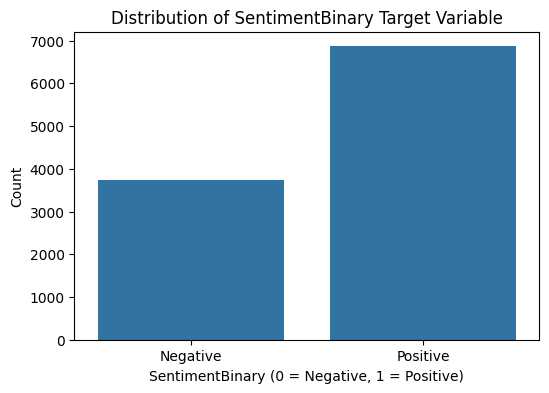

Proportion of each class:
Class 1: 6865 (64.77%)
Class 0: 3734 (35.23%)


In [ ]:
# count the occurrences of each class
class_counts = europe_df['SentimentBinary'].value_counts()

# plot the distribution of SentimentBinary
plt.figure(figsize=(6, 4))
sns.countplot(data=europe_df, x='SentimentBinary')
plt.title('Distribution of SentimentBinary Target Variable')
plt.xlabel('SentimentBinary (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.xticks([0, 1], labels=['Negative', 'Positive'])
plt.show()

# display the proportion of each class
total_count = len(europe_df['SentimentBinary'])
print("Proportion of each class:")
for label, count in class_counts.items():
    proportion = (count / total_count) * 100
    print(f"Class {label}: {count} ({proportion:.2f}%)")

### employment status

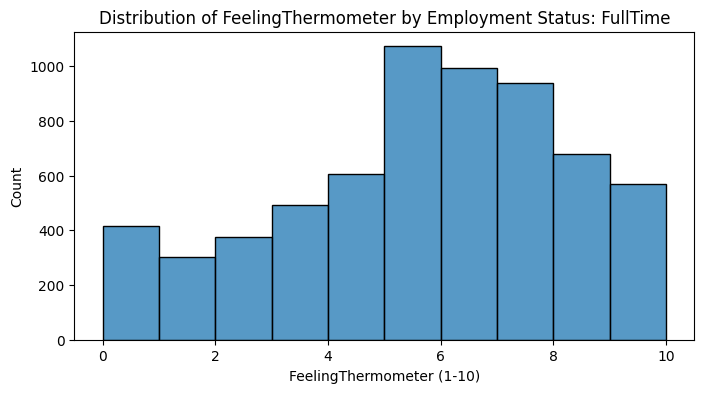

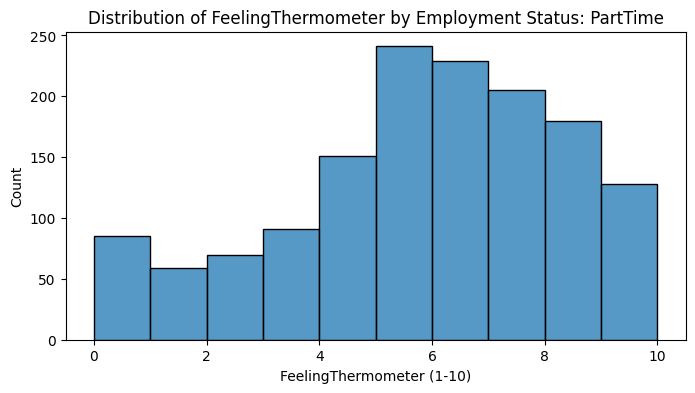

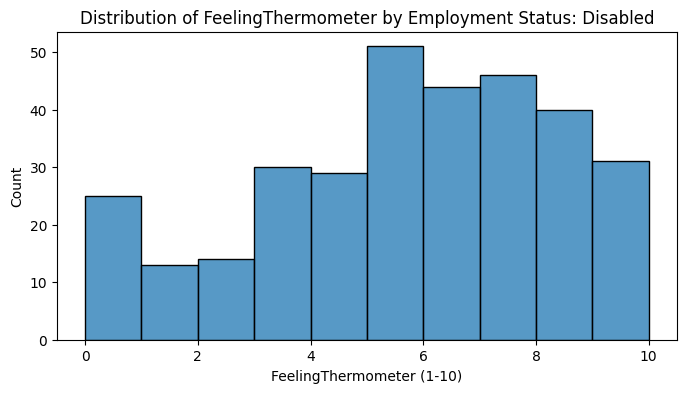

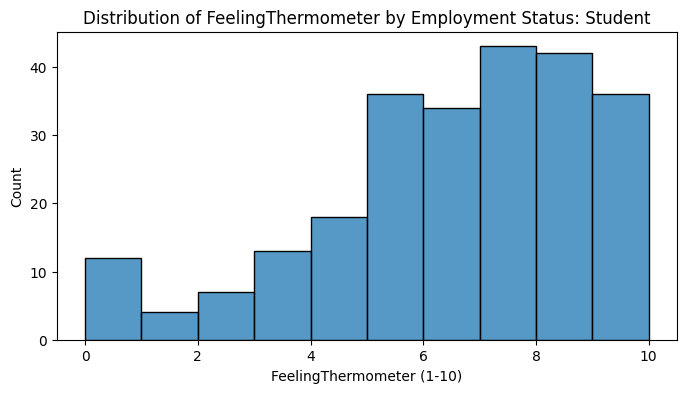

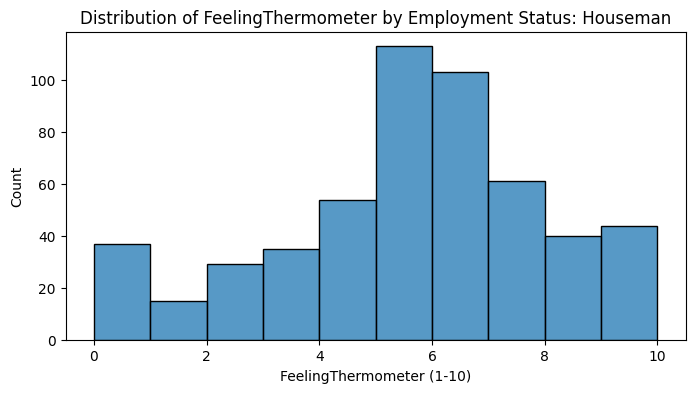

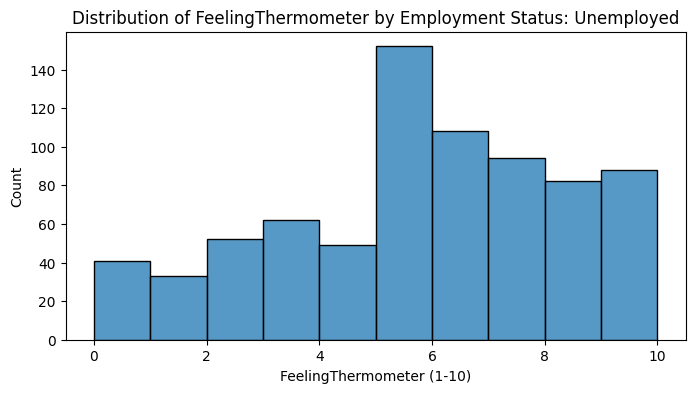

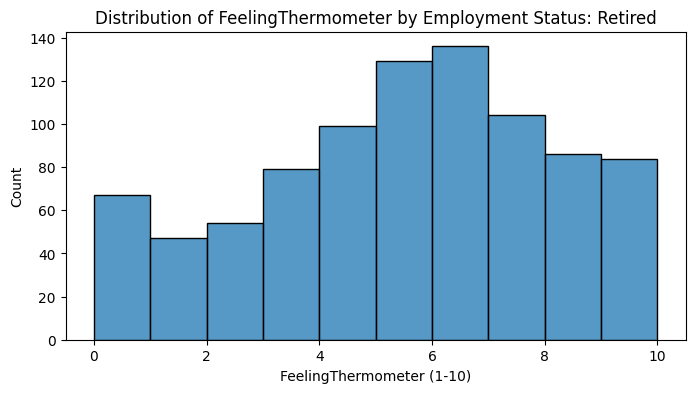

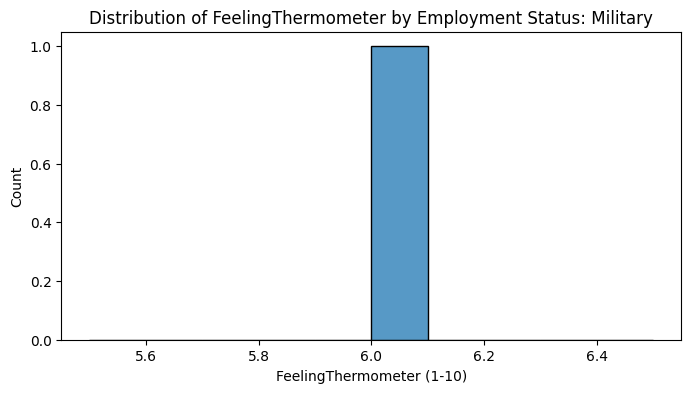

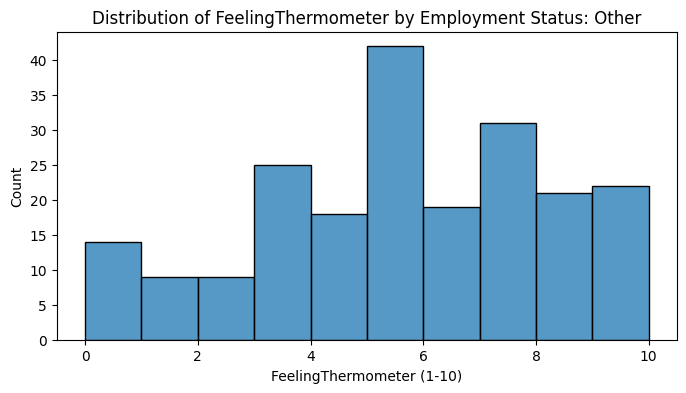

In [ ]:
# distribution of FeelingThermometer across different employment statuses
employment_status_cols = ['FullTime', 'PartTime', 'Disabled', 'Student', 'Houseman', 'Unemployed', 'Retired', 'Military', 'Other']
for col in employment_status_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=europe_df[europe_df[col] == 1], x='FeelingThermometer', bins=10)
    plt.title(f"Distribution of FeelingThermometer by Employment Status: {col}")
    plt.xlabel("FeelingThermometer (1-10)")
    plt.ylabel("Count")
    plt.show()


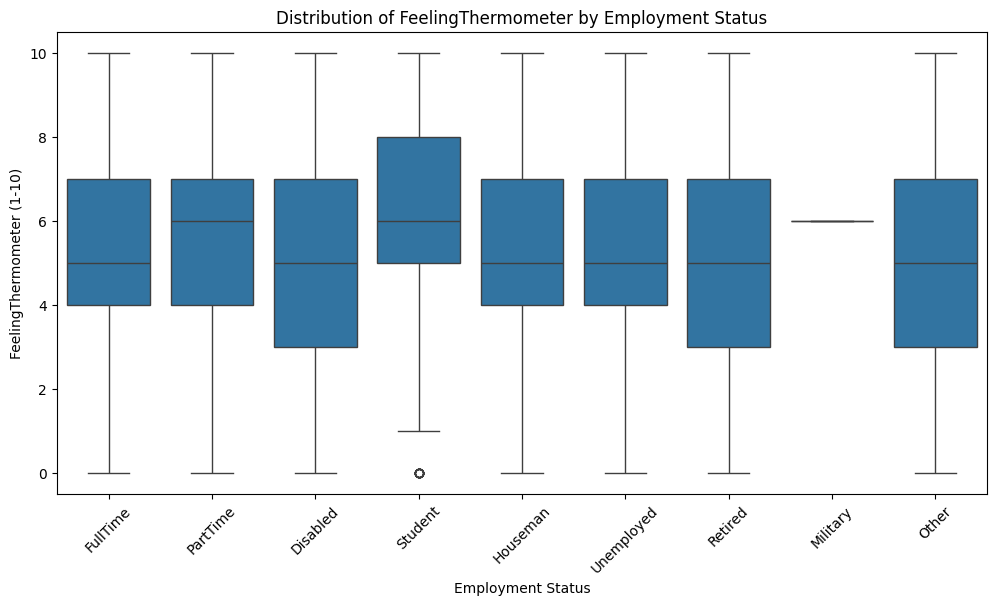

In [ ]:
# box plot of FeelingThermometer by Employment Status
plt.figure(figsize=(12, 6))
# melt the dataframe to create a long format suitable for seaborn
employment_status_melted = europe_df.melt(id_vars=['FeelingThermometer'], value_vars=employment_status_cols, var_name='EmploymentStatus', value_name='Status')
# filter only rows where the employment status is active (i.e., Status == 1)
employment_status_filtered = employment_status_melted[employment_status_melted['Status'] == 1]
sns.boxplot(data=employment_status_filtered, x='EmploymentStatus', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('FeelingThermometer (1-10)')
plt.xticks(rotation=45)
plt.show()

### education level

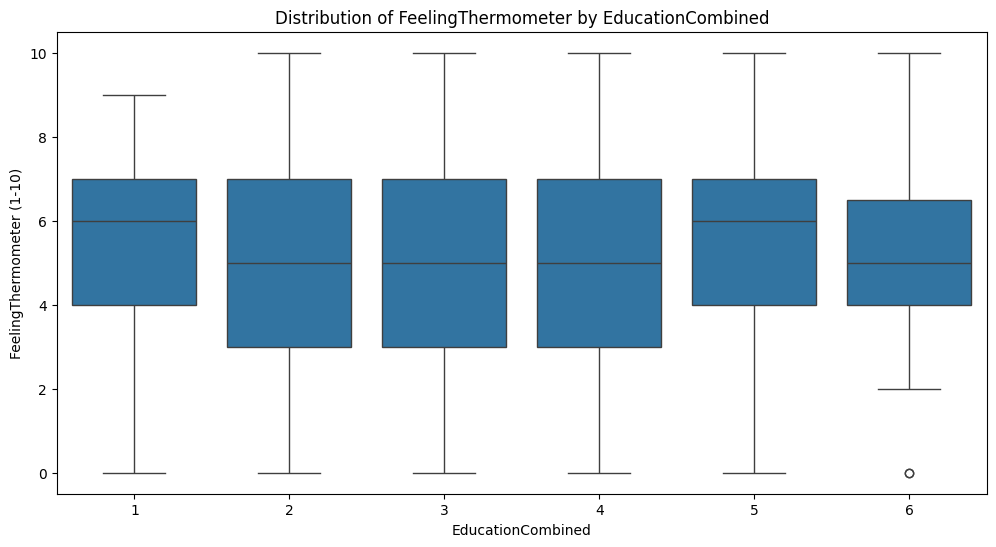

In [ ]:
# box plot of FeelingThermometer by EducationCombined
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df, x='EducationCombined', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by EducationCombined')
plt.xlabel('EducationCombined')
plt.ylabel('FeelingThermometer (1-10)')
plt.show()

### age

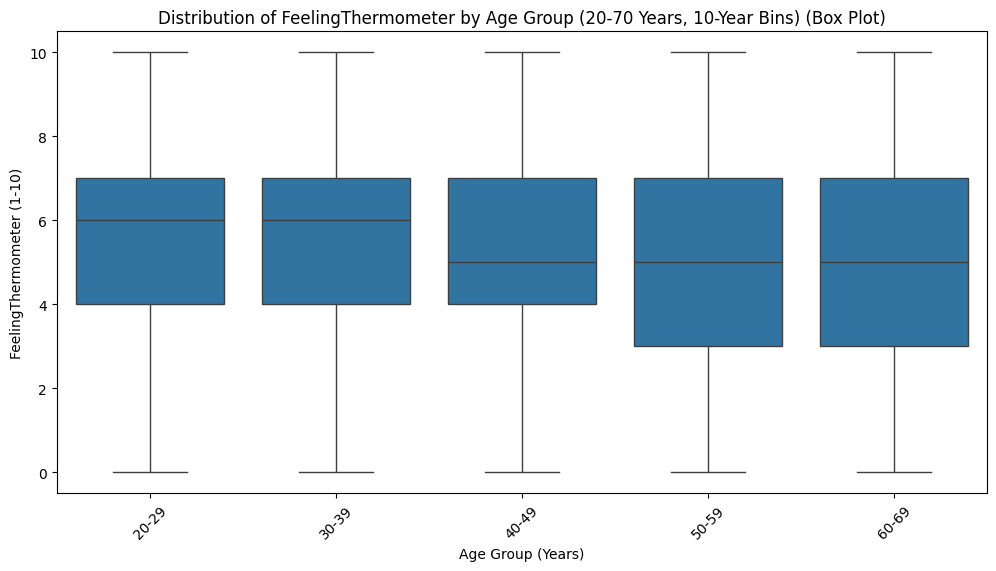

In [ ]:
# box plot of FeelingThermometer by Age (do before scaling)
europe_df['AgeGroup'] = pd.cut(europe_df['Age'], bins=np.arange(20, 80, 10), right=False, labels=[f'{i}-{i+9}' for i in range(20, 70, 10)])
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df.dropna(subset=['AgeGroup']), x='AgeGroup', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by Age Group (20-70 Years, 10-Year Bins) (Box Plot)')
plt.xlabel('Age Group (Years)')
plt.ylabel('FeelingThermometer (1-10)')
plt.xticks(rotation=45)
plt.show()

# drop age group after plotting
europe_df = europe_df.drop("AgeGroup", axis = 1)

### income

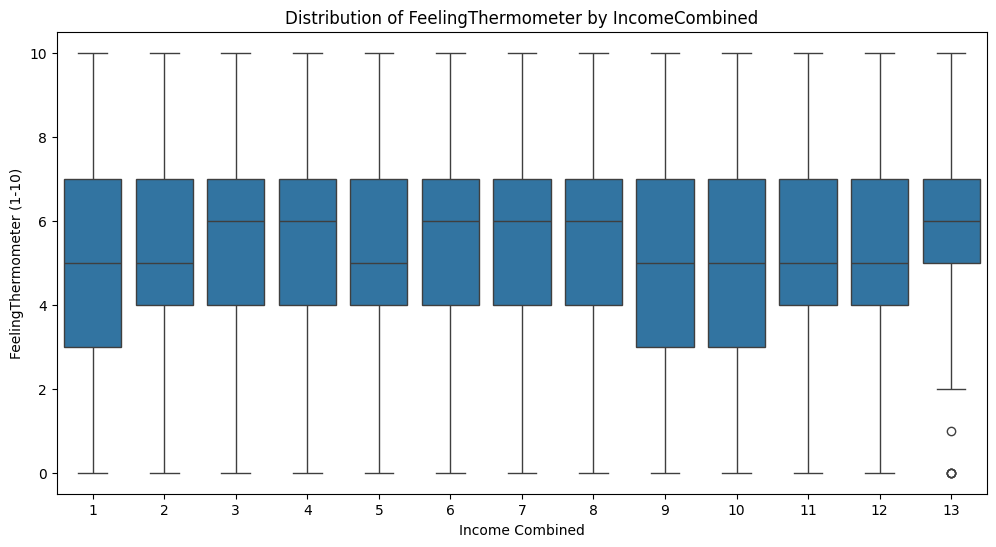

In [ ]:
# box plot of FeelingThermometer by IncomeCombined
plt.figure(figsize=(12, 6))
sns.boxplot(data=europe_df, x='IncomeCombined', y='FeelingThermometer')
plt.title('Distribution of FeelingThermometer by IncomeCombined')
plt.xlabel('Income Combined')
plt.ylabel('FeelingThermometer (1-10)')
plt.show()

# 4. Analysis
Fitting random forest classifiers

## Random Forest on SentimentBinary - all features (classification)

In [570]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [713]:
# scaling age
scaler = StandardScaler()
europe_df[['Age']] = scaler.fit_transform(europe_df[['Age']])

In [572]:
# random forest classifier for binary classification 
# exclude 'FeelingThermometer', 'ID', 'Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'
X_binary = europe_df.drop(columns=['SentimentBinary', 'FeelingThermometer', 'ID','Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'])
y_binary = europe_df['SentimentBinary']

In [574]:
# split test and training
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

In [575]:
# fit random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_binary, y_train_binary)

RandomForestClassifier(random_state=42)

In [576]:
# feature importance for SentimentBinary
importances_binary = rf_classifier.feature_importances_
features_binary = X_binary.columns
indices_binary = np.argsort(importances_binary)[::-1]

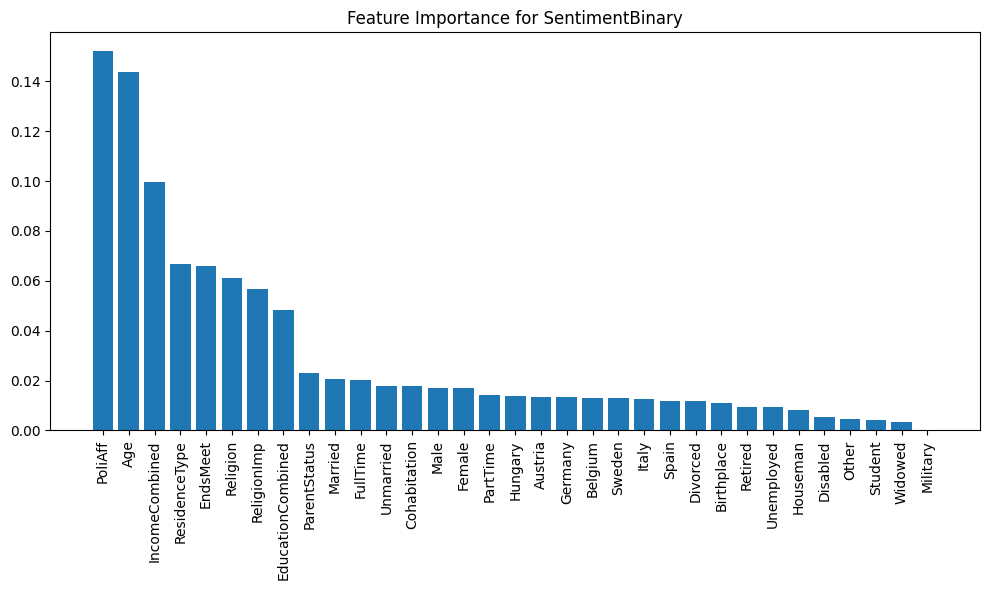

In [577]:
# plot feature importance for SentimentBinary
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for SentimentBinary")
plt.bar(range(X_binary.shape[1]), importances_binary[indices_binary], align="center")
plt.xticks(range(X_binary.shape[1]), features_binary[indices_binary], rotation=90)
plt.tight_layout()
plt.show()

### F1

In [578]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# make predictions
y_pred_binary = rf_classifier.predict(X_test_binary)

In [ ]:
# accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.35      0.43       735
           1       0.71      0.86      0.78      1385

    accuracy                           0.68      2120
   macro avg       0.64      0.60      0.61      2120
weighted avg       0.66      0.68      0.66      2120



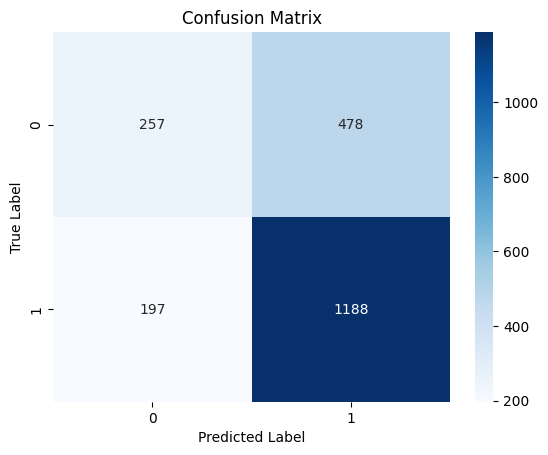

In [ ]:
# confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest on SentimentBinary - focused features (classification)

In [704]:
europe_df.keys()

Index(['ID', 'Age', 'Birthplace', 'FullTime', 'PartTime', 'Disabled',
       'Student', 'Houseman', 'Unemployed', 'Retired', 'Military', 'Other',
       'EndsMeet', 'PoliAff', 'Religion', 'ReligionImp', 'ResidenceType',
       'FeelingThermometer', 'Anger', 'Fear', 'Hope', 'Sympathy', 'Disgust',
       'Happiness', 'Belgium', 'Austria', 'Germany', 'Spain', 'Italy',
       'Hungary', 'Sweden', 'Male', 'Female', 'Unmarried', 'Cohabitation',
       'Married', 'Divorced', 'Widowed', 'ParentStatus', 'EducationCombined',
       'IncomeCombined', 'NegativeEmo', 'PositiveEmo', 'SentimentBinary'],
      dtype='object')

In [693]:
# looking at PoliAff, Religion, ParentStatus, EducationCombined, IncomeCombined
select_features_df = europe_df.drop(columns=['ID', 'Age', 'Birthplace', 'FullTime', 'PartTime', 'Disabled','Student', 'Houseman', 'Unemployed', 'Retired', 
'Military', 'Other','EndsMeet','ReligionImp', 'ResidenceType','FeelingThermometer', 'Anger', 'Fear', 'Hope', 'Sympathy', 'Disgust','Happiness', 'Belgium',
'Austria', 'Germany', 'Spain', 'Italy','Hungary', 'Sweden', 'Male', 'Female', 'Unmarried', 'Cohabitation','Married', 'Divorced', 'Widowed','NegativeEmo',
'PositiveEmo', 'SentimentBinary'])

In [694]:
X_binary = select_features_df
y_binary = europe_df['SentimentBinary']

In [695]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

In [696]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_binary, y_train_binary)

RandomForestClassifier(random_state=42)

In [705]:
importances_binary = rf_classifier.feature_importances_
features_binary = X_binary.columns
indices_binary = np.argsort(importances_binary)[::-1]

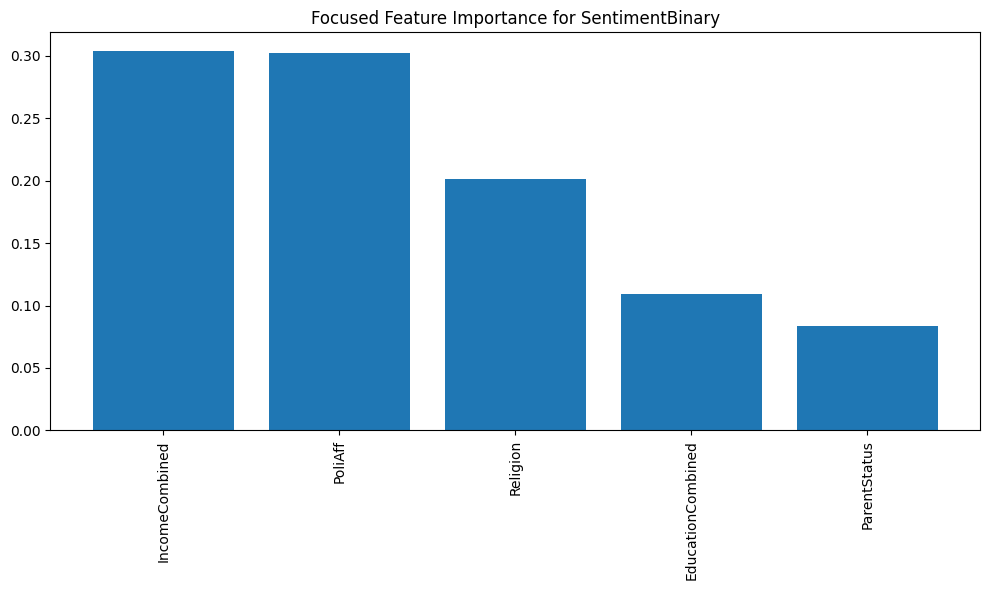

In [711]:
plt.figure(figsize=(10, 6))
plt.title("Focused Feature Importance for SentimentBinary")
plt.bar(range(X_binary.shape[1]), importances_binary[indices_binary], align="center")
plt.xticks(range(X_binary.shape[1]), features_binary[indices_binary], rotation=90)
plt.tight_layout()
plt.show()

### F1

In [707]:
y_pred_binary = rf_classifier.predict(X_test_binary)

In [708]:
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.65


In [709]:
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       735
           1       0.70      0.80      0.75      1385

    accuracy                           0.65      2120
   macro avg       0.60      0.58      0.59      2120
weighted avg       0.63      0.65      0.64      2120



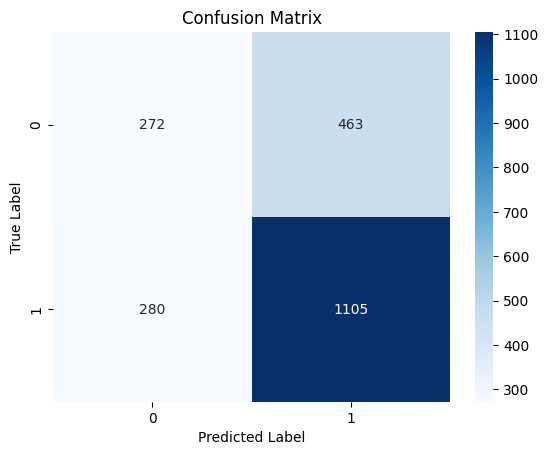

In [710]:
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest on SentimentBinary - SMOTE (classification)

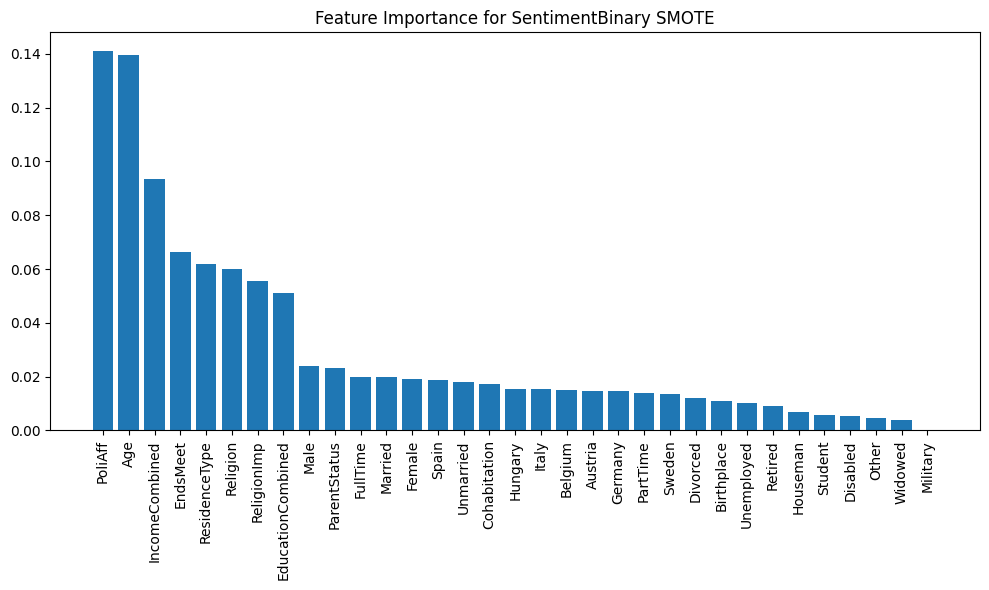

In [ ]:
# addressing positive class imbalance using SMOTE
X_binary = europe_df.drop(columns=['SentimentBinary', 'FeelingThermometer', 'ID', 'Anger', 'Fear', 'Hope', 'Sympathy', 'Disgust', 'Happiness', 'NegativeEmo', 'PositiveEmo'])
y_binary = europe_df['SentimentBinary']

smote = SMOTE(random_state=42)
X_binary_resampled, y_binary_resampled = smote.fit_resample(X_binary, y_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary_resampled, y_binary_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_binary, y_train_binary)

importances_binary = rf_classifier.feature_importances_
features_binary = X_binary.columns
indices_binary = np.argsort(importances_binary)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance for SentimentBinary SMOTE")
plt.bar(range(X_binary.shape[1]), importances_binary[indices_binary], align="center")
plt.xticks(range(X_binary.shape[1]), features_binary[indices_binary], rotation=90)
plt.tight_layout()
plt.show()

### F1

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1361
           1       0.75      0.75      0.75      1385

    accuracy                           0.75      2746
   macro avg       0.75      0.75      0.75      2746
weighted avg       0.75      0.75      0.75      2746



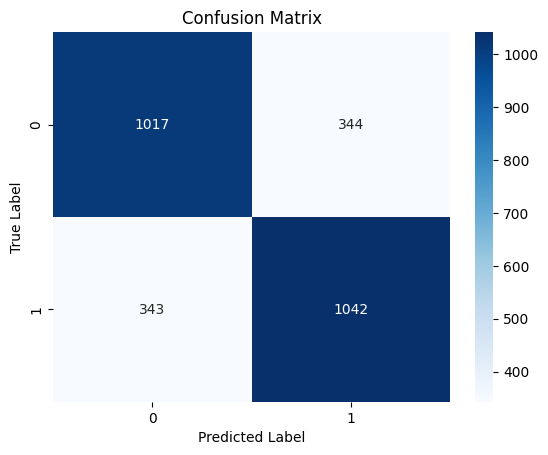

In [773]:
y_pred_binary = rf_classifier.predict(X_test_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest on SentimentBinary - SMOTE & focused features (classification)

In [775]:
# looking at PoliAff, Religion, ParentStatus, EducationCombined, IncomeCombined
select_features_df = europe_df.drop(columns=['ID', 'Age', 'Birthplace', 'FullTime', 'PartTime', 'Disabled','Student', 'Houseman', 'Unemployed', 'Retired', 
'Military', 'Other','EndsMeet','ReligionImp', 'ResidenceType','FeelingThermometer', 'Anger', 'Fear', 'Hope', 'Sympathy', 'Disgust','Happiness', 'Belgium',
'Austria', 'Germany', 'Spain', 'Italy','Hungary', 'Sweden', 'Male', 'Female', 'Unmarried', 'Cohabitation','Married', 'Divorced', 'Widowed','NegativeEmo',
'PositiveEmo', 'SentimentBinary'])

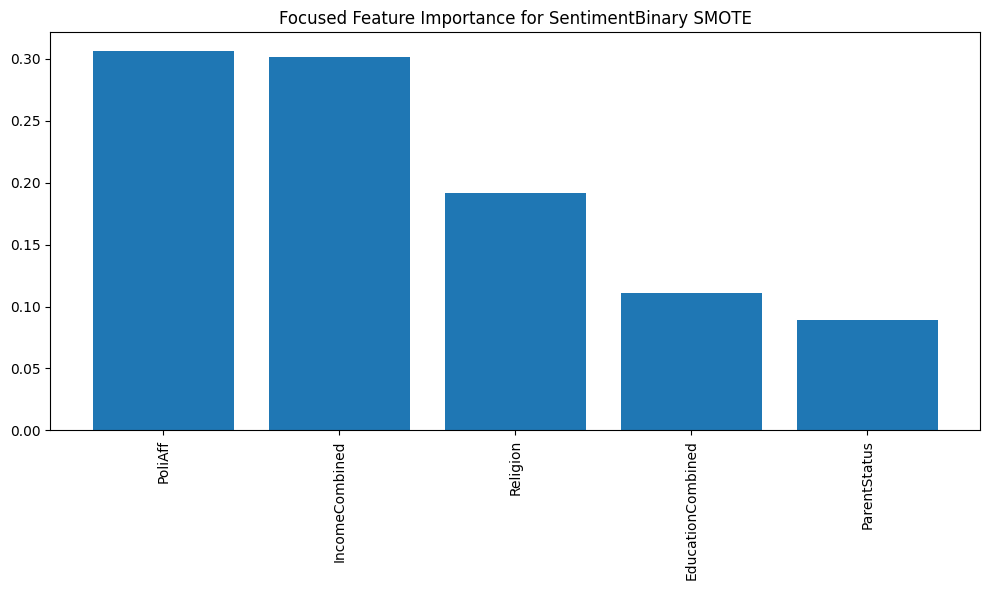

In [ ]:
# dddressing imbalance using SMOTE
X_binary = select_features_df
y_binary = europe_df['SentimentBinary']

smote = SMOTE(random_state=42)
X_binary_resampled, y_binary_resampled = smote.fit_resample(X_binary, y_binary)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary_resampled, y_binary_resampled, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_binary, y_train_binary)

importances_binary = rf_classifier.feature_importances_
features_binary = X_binary.columns
indices_binary = np.argsort(importances_binary)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Focused Feature Importance for SentimentBinary SMOTE")
plt.bar(range(X_binary.shape[1]), importances_binary[indices_binary], align="center")
plt.xticks(range(X_binary.shape[1]), features_binary[indices_binary], rotation=90)
plt.tight_layout()
plt.show()

### F1

Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.66      1361
           1       0.67      0.63      0.65      1385

    accuracy                           0.66      2746
   macro avg       0.66      0.66      0.66      2746
weighted avg       0.66      0.66      0.66      2746



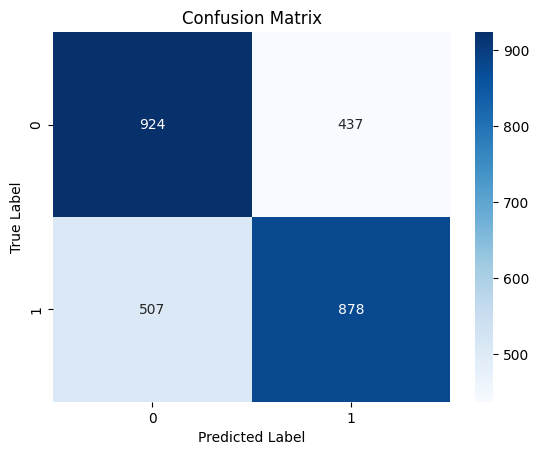

In [777]:
y_pred_binary = rf_classifier.predict(X_test_binary)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test_binary, y_pred_binary))
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Random Forest on FeelingThermometer (regression)

In [583]:
# random forest regressor for ordinal
# exclude 'FeelingThermometer', 'ID', 'Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'
X_regression = europe_df.drop(columns=['SentimentBinary', 'FeelingThermometer', 'ID','Anger','Fear','Hope','Sympathy','Disgust','Happiness','NegativeEmo','PositiveEmo'])
y_regression = europe_df['FeelingThermometer']

In [584]:
# split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [585]:
# fit random forest regressor 
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [586]:
# feature importance 
importances_regression = rf_regressor.feature_importances_
features_regression = X_regression.columns
indices_regression = np.argsort(importances_regression)[::-1]

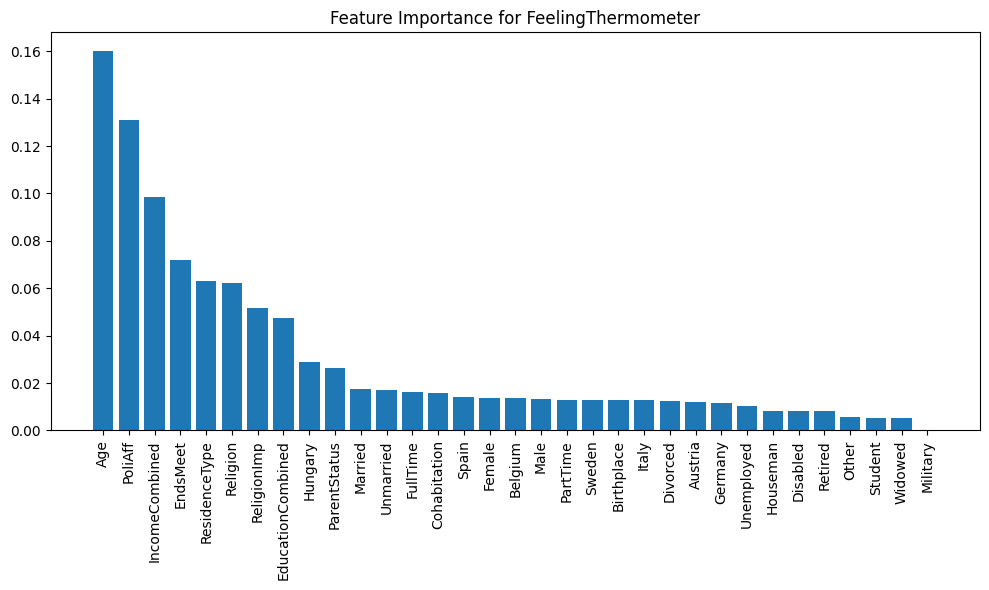

In [587]:
# plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for FeelingThermometer")
plt.bar(range(X_regression.shape[1]), importances_regression[indices_regression], align="center")
plt.xticks(range(X_regression.shape[1]), features_regression[indices_regression], rotation=90)
plt.tight_layout()
plt.show()

### Mean Absolute Error, Mean Squared Error, R² Score

In [ ]:
# make predictions for regression
y_pred_reg = rf_regressor.predict(X_test_reg)

In [ ]:
# mean Absolute Error
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 1.89


In [ ]:
# mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 5.69


In [ ]:
# R^2 Score
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² Score: {r2:.2f}")

R² Score: 0.13
